In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\Lore\12.2020ProiectCursDA\6 Covid Economies\df.csv', index_col = False)

In [4]:
path = r'C:\Users\Lore\12.2020ProiectCursDA'

In [5]:
path

'C:\\Users\\Lore\\12.2020ProiectCursDA'

In [6]:
df.shape

(49991, 13)

In [7]:
df.head()

,Unnamed: 0,CODE,COUNTRY,CITY,CONTINENT,EU,DATE,HDI,TC,TD,STI,Population,GDPCAP
0,0,AFG,Afghanistan,Kabul,Asia,No,12/31/2019,0.498,0.0,0.0,0.0,17.477233,7.497754
1,1,AFG,Afghanistan,Kabul,Asia,No,1/1/2020,0.498,0.0,0.0,0.0,17.477233,7.497754
2,2,AFG,Afghanistan,Kabul,Asia,No,1/2/2020,0.498,0.0,0.0,0.0,17.477233,7.497754
3,3,AFG,Afghanistan,Kabul,Asia,No,1/3/2020,0.498,0.0,0.0,0.0,17.477233,7.497754
4,4,AFG,Afghanistan,Kabul,Asia,No,1/4/2020,0.498,0.0,0.0,0.0,17.477233,7.497754


In [8]:
#Q2
df.drop(["Unnamed: 0", "CODE", "COUNTRY", "CITY", "CONTINENT", "EU", "DATE"], axis=1, inplace = True)

In [9]:
df.head()

,HDI,TC,TD,STI,Population,GDPCAP
0,0.498,0.0,0.0,0.0,17.477233,7.497754
1,0.498,0.0,0.0,0.0,17.477233,7.497754
2,0.498,0.0,0.0,0.0,17.477233,7.497754
3,0.498,0.0,0.0,0.0,17.477233,7.497754
4,0.498,0.0,0.0,0.0,17.477233,7.497754


In [10]:
#Q3
#The elbow technique
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents a rate of variation for the given cluster option.
score

[-2075144.929126217,
 -1172810.6549719276,
 -748175.4189975519,
 -558177.1878264882,
 -479024.2113053854,
 -423897.09456422174,
 -377721.20154743077,
 -338781.60111514624,
 -310902.82083559554]

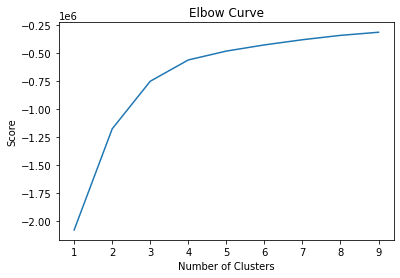

In [12]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#Q4
Here's a jump from 3 to 4 on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is 4.

In [32]:
#Q5 Create the k-means object.
kmeans = KMeans(n_clusters = 10000, n_jobs = -1) 

In [33]:
# Fit the k-means object to the data.
kmeans.fit(df)

C:\Users\Lore\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


KMeans(n_clusters=10000, n_jobs=-1)

In [34]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\Lore\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


In [35]:
df.head()

,HDI,TC,TD,STI,Population,GDPCAP,clusters
0,0.498,0.0,0.0,0.0,17.477233,7.497754,365
1,0.498,0.0,0.0,0.0,17.477233,7.497754,365
2,0.498,0.0,0.0,0.0,17.477233,7.497754,365
3,0.498,0.0,0.0,0.0,17.477233,7.497754,365
4,0.498,0.0,0.0,0.0,17.477233,7.497754,365


In [36]:
#Q6
df['clusters'].value_counts()

45      177
4       166
81      159
429     115
206      87
       ... 
7278      1
5199      1
3148      1
7707      1
8917      1
Name: clusters, Length: 10000, dtype: int64

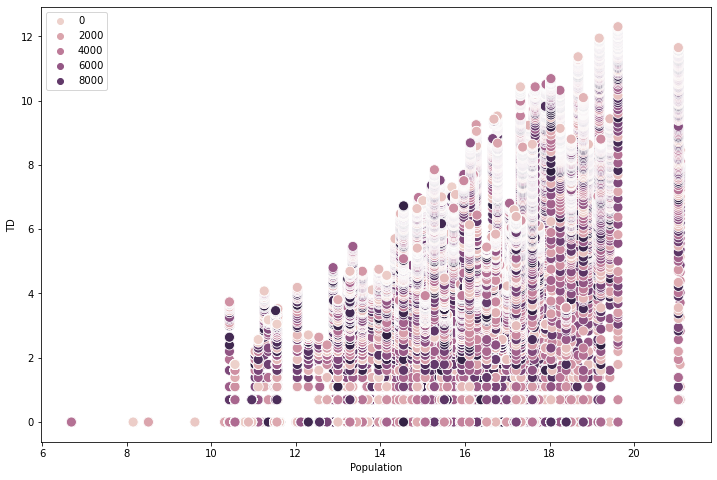

In [37]:
#Q7
# Plot the clusters for the "TD" and "Population" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Population'], y=df['TD'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Population') # Label x-axis.
plt.ylabel('TD') # Label y-axis.
plt.show()

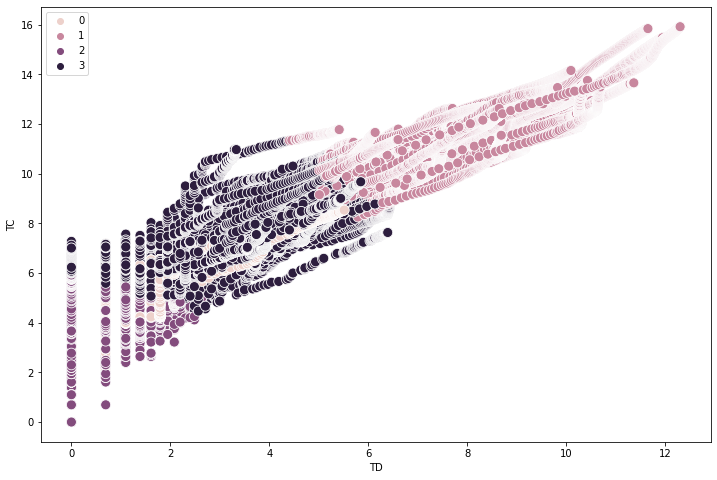

In [19]:
# Plot the clusters for the "TD" and "TC" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['TD'], y=df['TC'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('TD') 
plt.ylabel('TC') 
plt.show()

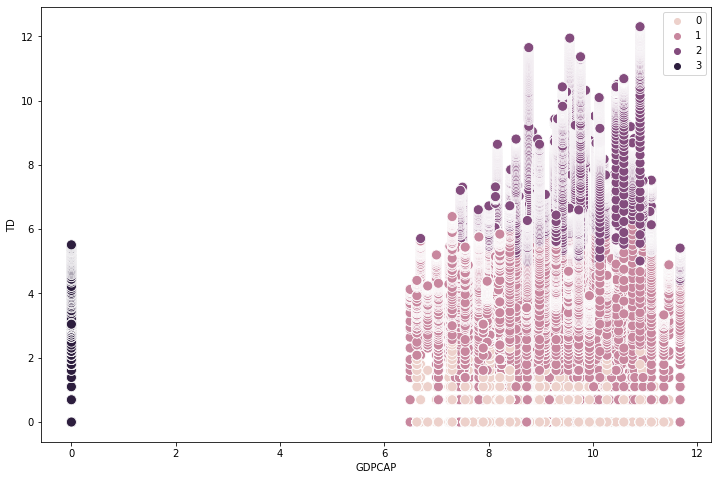

In [24]:
# Plot the clusters for the "TD" and "GDPCAP" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['GDPCAP'], y=df['TD'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('GDPCAP') 
plt.ylabel('TD') 
plt.show()

#Q8
The clusters make sense because they are grouped by values. There are 4 clusters.

In [28]:
#Q9
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [29]:
df.groupby('cluster').agg({'HDI':['mean', 'median'], 
                         'STI':['mean', 'median'], 
                         'GDPCAP':['mean', 'median'],
                           'Population':['mean', 'median'],
                           'TC':['mean', 'median'],
                          'TD':['mean', 'median']})

HDI              STI              GDPCAP            \
                 mean median      mean    median      mean    median   
cluster                                                                
dark purple  0.123816  0.000  1.778119  0.000000  0.000000  0.000000   
light pink   0.679916  0.736  2.498820  3.218876  9.377566  9.492126   
pink         0.662723  0.702  3.698240  4.127779  9.085250  9.189712   
purple       0.781898  0.798  3.936242  4.220390  9.814219  9.856533   

            Population                    TC                   TD            
                  mean     median       mean     median      mean    median  
cluster                                                                      
dark purple  11.694021  11.113224   4.386416   4.406719  1.145131  0.000000  
light pink   15.139842  15.436418   2.639945   2.890372  0.253608  0.000000  
pink         15.691634  15.733109   7.758135   7.716461  3.724579  3.828641  
purple       17.303761  17.424008  11.258971  11.089729  7.739090  7.434257

The results show us this:
-HDI mean and median: This variable is big in the purple, pink and light pink clusters. It is normal to be like this, because this variable is about human development. In the cluster dark purple are very poor countries, so no development.
-STI mean and median: This variable is big in the purple, pink and light pink clusters. This is a composite measure based on nine response indicators, including school closures, workplace closures, and travel bans, so in the very poor countries is normal to be smal value because they don't have a lot of this variable.
-GDPCAP mean and median: The values for GDPCAP are the same for 3 from 4 clusters: purple, pink and light pink. And for the dark purple GDPCAP is 0, this mean that in that cluster is very poor countries.
-Population mean and median: The value of Population is connected with TC and TD. The biggest values are in clusters, purple, pink and light pink.
-TC mean and median: The purple cluster is the biggest and after that is pink cluster. The number of confirmed infected with covid is big in a lot of countries. So yes, the clusters are ok.
-TD mean and TD median: If the TC is big then TD (total deaths) is normal to be big, because this variable are connected. So the purple and pink clusters are the biggest.

In [ ]:
#Q10
These results could be useful in future steps of an analytics pipeline.